## Introduction

#####Après avoir testé les algorithmes de classification sur la premiere DT de 65k logs.
#####Dans ce projet, nous allons essayer de tester les mémes algorithmes sur une autre Dataset de 172838 logs pour voir est-ce-que nos algorithmes vont garder les memes performances. 



## table de matiére


1.   Importing libraries and modules,
2.   Load data,
3.   Preparing Data,
4.   GBN Classifier,
5.   KNN Classifier,
6.   Random forest Classifier,
7.   Decision tree Classifier
8.   DNN

## 1. Importing libraries and modules.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Load Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
Data_PATH=r'/gdrive/My Drive/CIDDS-001-external-week1.csv'

In [ ]:
df=pd.read_csv(Data_PATH)

In [ ]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-14 17:43:57.172,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,1,.AP...,0,normal,---,---,---
1,2017-03-14 17:43:57.172,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,1,.AP...,0,normal,---,---,---
2,2017-03-14 17:43:26.135,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,1,.AP...,0,normal,---,---,---
3,2017-03-14 17:43:26.135,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,1,.AP...,0,normal,---,---,---
4,2017-03-14 18:17:09.005,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,1,.AP.S.,0,normal,---,---,---


#3. Preparing Data

In [ ]:
data=df.copy()

In [ ]:
data=data[["Src Pt","Dst Pt","Bytes","Packets","class","Duration"]]

In [ ]:
print('The dataset contain {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset contain 172838 rows and 6 columns


In [ ]:
data.dtypes

Src Pt        int64
Dst Pt      float64
Bytes        object
Packets       int64
class        object
Duration    float64
dtype: object

In [ ]:
import re
def convtonum(data):
    num1=data["Bytes"]
    if "M" in data["Bytes"]:
        num=re.findall("[0-9.0-9]",data["Bytes"])
        num1 = float("".join(num))*100000
    num1 = float(num1)
    return num1

In [ ]:
data["Bytes"] = data.apply(convtonum,axis = 1)

In [ ]:
(data.isna().sum()/data.shape[0]).sort_values()

Src Pt      0.0
Dst Pt      0.0
Bytes       0.0
Packets     0.0
class       0.0
Duration    0.0
dtype: float64

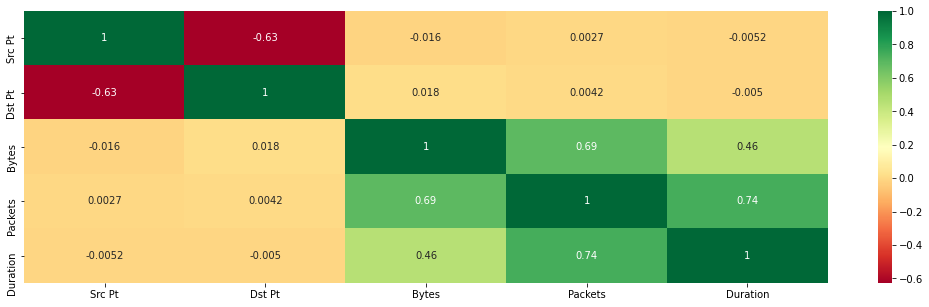

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,5))
sns.heatmap(data.corr(),annot=True,cmap = "RdYlGn")

In [ ]:
X=data[["Src Pt","Dst Pt","Bytes","Packets","Duration"]]
Y=data["class"]

In [ ]:
le = LabelEncoder()
y=le.fit_transform(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

# 4.Gaussian Naive Bayes Classifier

In [ ]:
model=GaussianNB()
gnb=model.fit(X_train,y_train)

print("Testing score",gnb.score(X_test,y_test))

Testing score 0.6060807683406619


# 5. KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=2)
knn=model.fit(X_train,y_train)

print("Testing score",knn.score(X_test,y_test))

Testing score 0.9843496875723212


#6. Random Forest

In [ ]:
model=RandomForestClassifier(n_estimators=100)
rf=model.fit(X_train,y_train)
print("Testing score",rf.score(X_test,y_test))

Testing score 0.999537144179588


#7. Decision Tree

In [ ]:
model=DecisionTreeClassifier()
dt=model.fit(X_train,y_train)
print("Testing score",dt.score(X_test,y_test))

Testing score 0.9990453598704003


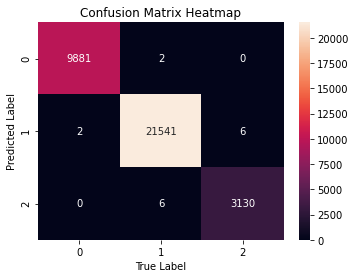

In [ ]:
import seaborn as sb
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

dt_predicted=rf.predict(X_test)
dt_confuse=confusion_matrix(y_test,dt_predicted)
df_cm=pd.DataFrame(dt_confuse)

plt.figure(figsize=(5.5,4))
sb.heatmap(df_cm,annot=True,fmt='g')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

#8. DNN

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train,y_train,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
2161/2161 [==============================] - 3s 1ms/step - loss: 94.1886 - accuracy: 0.7612
Epoch 2/10
2161/2161 [==============================] - 3s 1ms/step - loss: 0.4046 - accuracy: 0.8498
Epoch 3/10
2161/2161 [==============================] - 3s 1ms/step - loss: 0.3814 - accuracy: 0.8605
Epoch 4/10
2161/2161 [==============================] - 3s 1ms/step - loss: 0.3982 - accuracy: 0.8749
Epoch 5/10
2161/2161 [==============================] - 3s 1ms/step - loss: 0.3942 - accuracy: 0.8845
Epoch 6/10
2161/2161 [==============================] - 3s 1ms/step - loss: 0.3756 - accuracy: 0.8875
Epoch 7/10
2161/2161 [==============================] - 2s 1ms/step - loss: 0.3346 - accuracy: 0.8904
Epoch 8/10
2161/2161 [==============================] - 3s 1ms/step - loss: 0.3064 - accuracy: 0.8944
Epoch 9/10
2161/2161 [==============================] - 3s 1ms/step - loss: 0.2579 - accuracy: 0.8973
Epoch 10/10
2161/2161 [==============================] - 2s 1ms/step - loss: 0.25

In [ ]:
#train set
print("TRAIN SET:")
print("Loss du model est: " , model.evaluate(X_train,y_train)[0])
print("L'Accuracy du model est: " , model.evaluate(X_train,y_train)[1]*100 , "%")
# test set
print("TEST SET:")
print("Loss du model est: " , model.evaluate(X_test,y_test)[0])
print("L'Accuracy du model est: " , model.evaluate(X_test,y_test)[1]*100 , "%")


TRAIN SET:
4321/4321 [==============================] - 4s 913us/step - loss: 0.2559 - accuracy: 0.8926
Loss du model est:  0.2559358477592468
4321/4321 [==============================] - 4s 927us/step - loss: 0.2559 - accuracy: 0.8926
L'Accuracy du model est:  89.25580382347107 %
TEST SET:
1081/1081 [==============================] - 1s 892us/step - loss: 0.2574 - accuracy: 0.8943
Loss du model est:  0.25741297006607056
1081/1081 [==============================] - 1s 896us/step - loss: 0.2574 - accuracy: 0.8943
L'Accuracy du model est:  89.42663669586182 %
